# 2. Data Exploration and Preprocessing

In this section the data is loaded and explored. The data is preprocessed and transformed into a format that can be used for the machine learning models.
This includes:
* Loading the data from the csv file and loading python libraries
* Exploring Target and Features
    * Checking for missing values
    * Exploring the target, number of accidents by accident types
    * Exploring the features
        * Number of accidents by type and day of the week
        * Number of accidents by type and hour of the day
        * Number of accidents by type and month
        * Number of accidents by type and road type
* Encoding Ordinal and Categorical Features
* Normalizing the data

## 2.1 Import Libraries and Load Data

In [667]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

# Load the data
data = pd.read_csv('roadtrafficaccidentlocations.csv')
data.head() 




,AccidentUID,AccidentType,AccidentType_de,AccidentType_fr,AccidentType_it,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_de,AccidentSeverityCategory_fr,AccidentSeverityCategory_it,...,AccidentMonth_fr,AccidentMonth_it,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_de,AccidentWeekDay_fr,AccidentWeekDay_it,AccidentWeekDay_en,AccidentHour,AccidentHour_text
0,9FC221265B5EE0F0E0430A865E33E0F0,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,Accident with skidding or self-accident,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw405,Freitag,vendredi,Venerdì,Friday,8,08h-09h
1,9FC221265E13E0F0E0430A865E33E0F0,at7,Parkierunfall,accident en parquant,Incidente nel parcheggiare,Accident when parking,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw406,Samstag,samedi,Sabato,Saturday,17,17h-18h
2,9FC22126601FE0F0E0430A865E33E0F0,at3,Abbiegeunfall,accident en quittant une route,Incidente nello svoltare,Accident when turning left or right,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw404,Donnerstag,jeudi,Giovedì,Thursday,10,10h-11h
3,9FC22126614DE0F0E0430A865E33E0F0,at2,Auffahrunfall,accident par tamponnement,Incidente di tamponamento,Accident with rear-end collision,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw404,Donnerstag,jeudi,Giovedì,Thursday,13,13h-14h
4,9FC2212663A3E0F0E0430A865E33E0F0,at7,Parkierunfall,accident en parquant,Incidente nel parcheggiare,Accident when parking,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw403,Mittwoch,mercredi,Mercoledì,Wednesday,10,10h-11h


## 2.2 Feature Selection and Target Definition
The Data contains a lot of columns. We are only interested in the following columns as features:
* AccidentType_en
* RoadType_en
* AccidentMonth
* AccidentWeekDay_en
* AccidentHour
* AccidentInvolvedPederastrian
* AccidentInvolvedBicycle
* AccidentInvolvedMotorcycle

The target variable will be: 
* AccidentSeverityCategory_en

In [668]:
# Selecting the columns we are interested in
data = data[['AccidentSeverityCategory_en', 'AccidentType_en', 'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle',
       'AccidentInvolvingMotorcycle', 'RoadType_en', 'AccidentMonth', 'AccidentWeekDay_en', 'AccidentHour']]
data.head(3000)

,AccidentSeverityCategory_en,AccidentType_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType_en,AccidentMonth,AccidentWeekDay_en,AccidentHour
0,Accident with property damage,Accident with skidding or self-accident,False,False,False,Minor road,1,Friday,8
1,Accident with property damage,Accident when parking,False,False,False,Minor road,1,Saturday,17
2,Accident with property damage,Accident when turning left or right,False,False,False,Minor road,1,Thursday,10
3,Accident with property damage,Accident with rear-end collision,False,False,False,Principal road,1,Thursday,13
4,Accident with property damage,Accident when parking,False,False,False,Other,1,Wednesday,10
...,...,...,...,...,...,...,...,...,...
2995,Accident with severe injuries,Accident with rear-end collision,False,True,False,Minor road,4,Wednesday,9
2996,Accident with light injuries,Accident involving pedestrian(s),True,False,False,Minor road,4,Sunday,2
2997,Accident with property damage,Accident with skidding or self-accident,False,False,False,Principal road,3,Thursday,15
2998,Accident with light injuries,Accident with skidding or self-accident,False,True,False,Principal road,6,Sunday,3


## 2.3 Missing Values

Checking for missing values

In [669]:
for col in data.columns:
    print(col, data[col].isnull().sum())


AccidentSeverityCategory_en 0
AccidentType_en 0
AccidentInvolvingPedestrian 0
AccidentInvolvingBicycle 0
AccidentInvolvingMotorcycle 0
RoadType_en 0
AccidentMonth 0
AccidentWeekDay_en 0
AccidentHour 0


No missing values detected. It can be proceeded without further actions.

## 2.4 Target Exploration

At first the Target is explored. For This the number of accidents by type is plotted.

Text(0.5, 1.0, 'Number of Accidents by Severity')

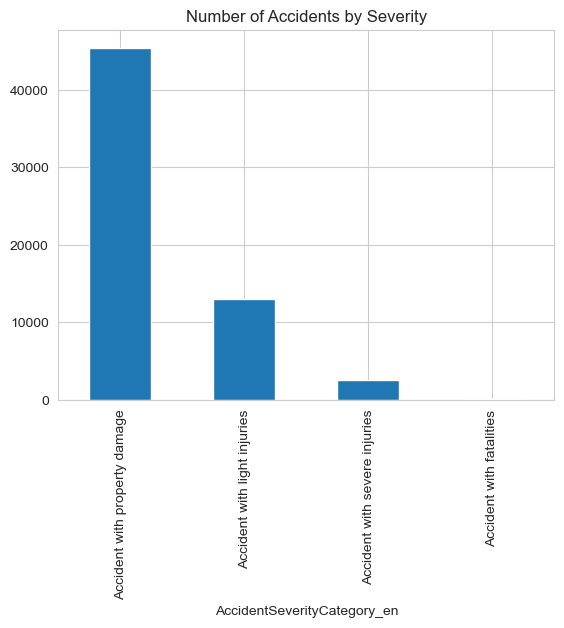

In [670]:
# Number of Accidents by Severity
data['AccidentSeverityCategory_en'].value_counts().plot(kind='bar')
plt.title('Number of Accidents by Severity')


The data looks a bit unbalanced. Since there are a lot of observations, this should not be a problem.
It can be observed that major accidents are such with property damage. Approximately three times less are accidents with light injuries. Accidents with sever injuries or fatalities happen quite less. 

In [671]:
# Number of Accidents of each accident type
data['AccidentSeverityCategory_en'].value_counts()


AccidentSeverityCategory_en
Accident with property damage    45427
Accident with light injuries     13006
Accident with severe injuries     2540
Accident with fatalities            85
Name: count, dtype: int64

## 2.5 Feature and target Exploration
### 2.5.1 Number of Accidents Severity and Day of the Week

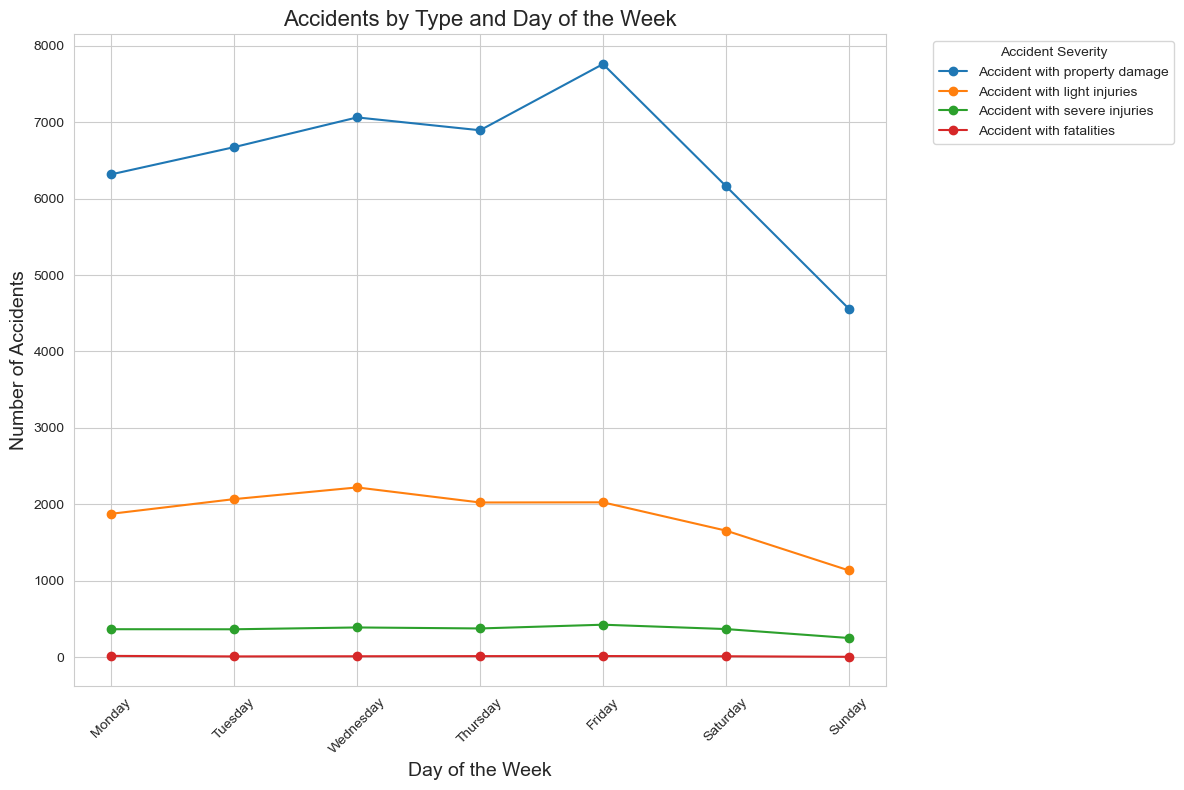

In [672]:
# numer of accidents by accident type and day of the week
# extracting the data
accidents_per_day = {}
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for AccidentDay in data['AccidentWeekDay_en'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['AccidentWeekDay_en'] == AccidentDay)
        ].shape[0]
        counts.append(count)
    accidents_per_day[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
columns = data['AccidentWeekDay_en'].unique() 
result_df = pd.DataFrame.from_dict(accidents_per_day, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Type and Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
    
        

The number of accidents is quite constant over the week.
The number of accidents on weekends is lower than on weekdays. But an increase of accidents with property damage can be observed on Fridays.

### 2.5.2 Number of Accidents by Severity and Hour of the Day


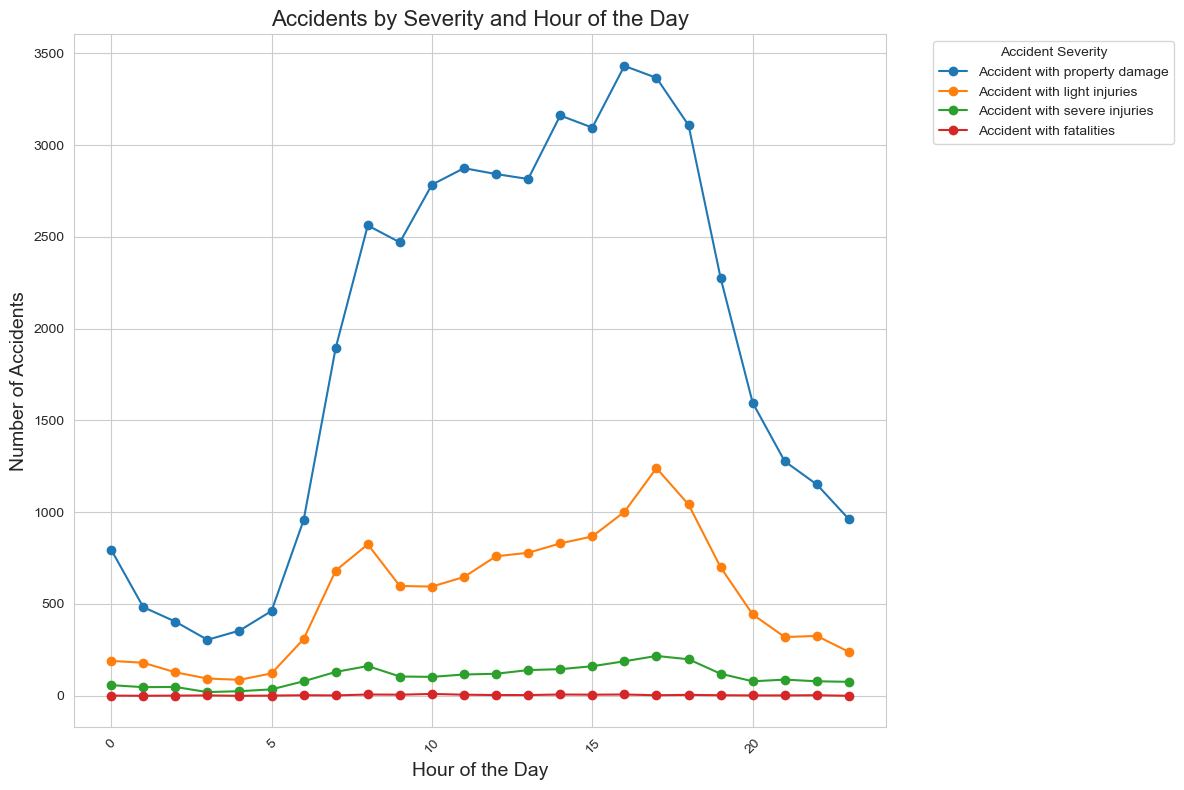

In [673]:
# numer of accidents by accident severity and hour of the day
# extracting the data
accidents_per_hour = {}
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for AccidentHour in data['AccidentHour'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['AccidentHour'] == AccidentHour)
        ].shape[0]
        counts.append(count)
    accidents_per_hour[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
columns = data['AccidentHour'].unique()  
result_df = pd.DataFrame.from_dict(accidents_per_hour, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Severity and Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The number of accidents is the lowest between 1 and 5 o'clock. The number of accidents is the highest between 16 and 18 o'clock.
A tendency can be observed that the number of accidents increase towards the afternoon and evening hours.

### 2.5.3 Number of Accidents by Severity and Month

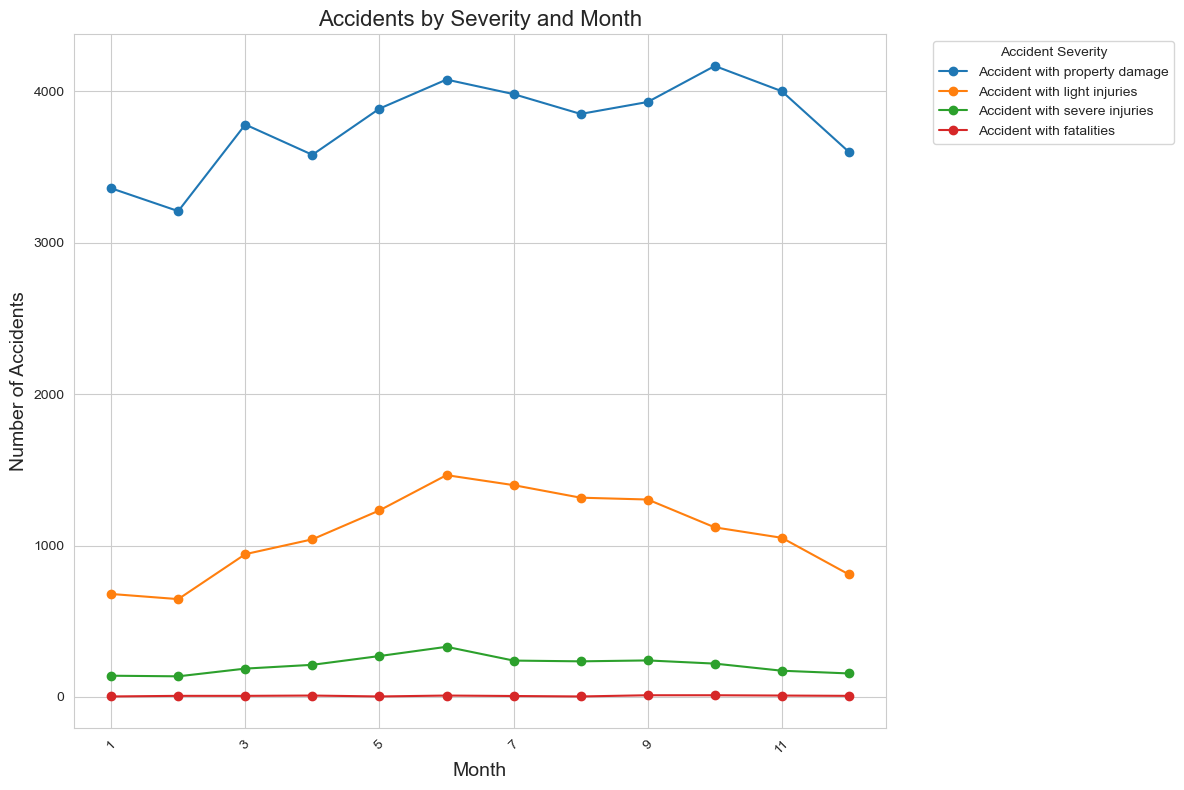

In [674]:
# numer of accidents by accident severity and month
# extracting the data
accidents_per_month = {}
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for AccidentMonth in data['AccidentMonth'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['AccidentMonth'] == AccidentMonth)
        ].shape[0]
        counts.append(count)
    accidents_per_month[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
columns = data['AccidentMonth'].unique()
result_df = pd.DataFrame.from_dict(accidents_per_month, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot

plt.title('Accidents by Severity and Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The number of accidents seems to be lower in winter months. The number of accidents is slightly higher in summer months. The difference is not that remarkable. 

### 2.5.4 Number of Accidents by Severity and Road Type

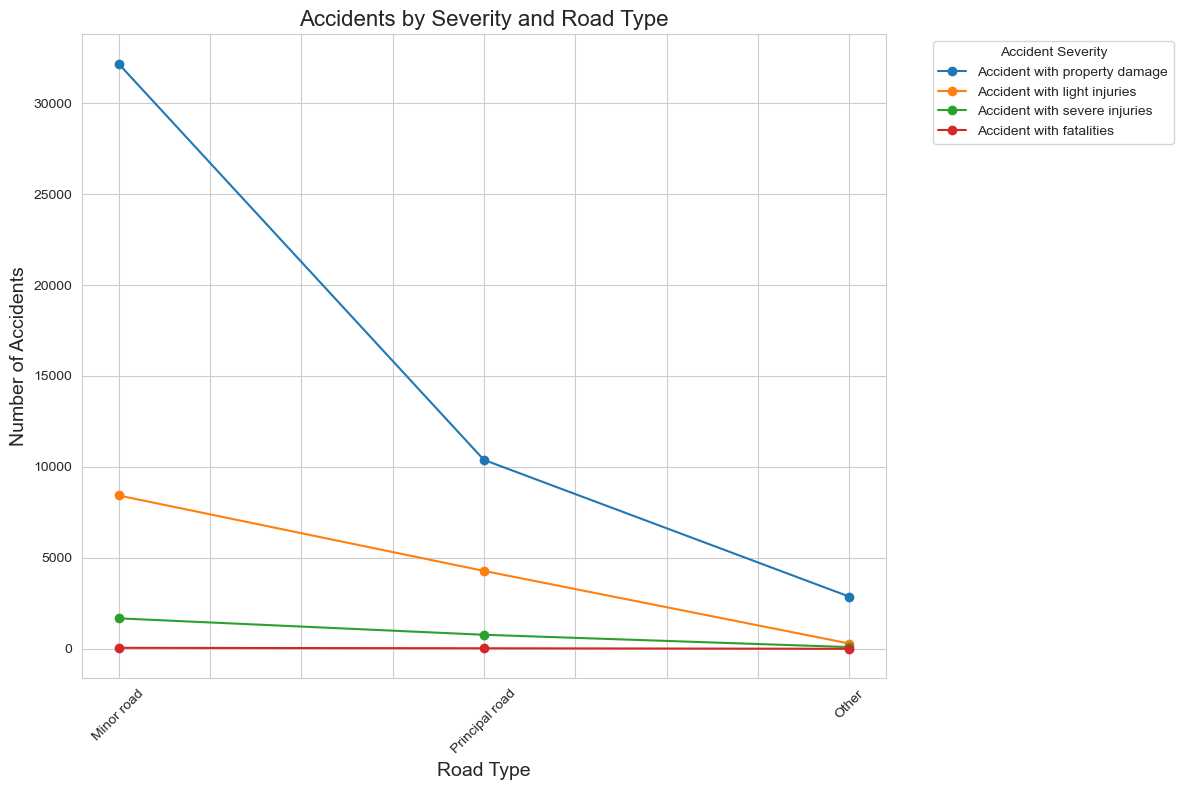

In [675]:
# numer of accidents by accident severity and road type
# extracting the data
accidents_per_road = {}

for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for RoadType in data['RoadType_en'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['RoadType_en'] == RoadType)
        ].shape[0]
        counts.append(count)
    accidents_per_road[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = ['Minor road', 'Principal road', 'Other']
columns = data['RoadType_en'].unique()
result_df = pd.DataFrame.from_dict(accidents_per_road, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Severity and Road Type', fontsize=16)
plt.xlabel('Road Type', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
    
plt.show()



There are more accidents on minor roads than on principal roads. 
## 2.5.5 Number of Accidents by Severity and Type

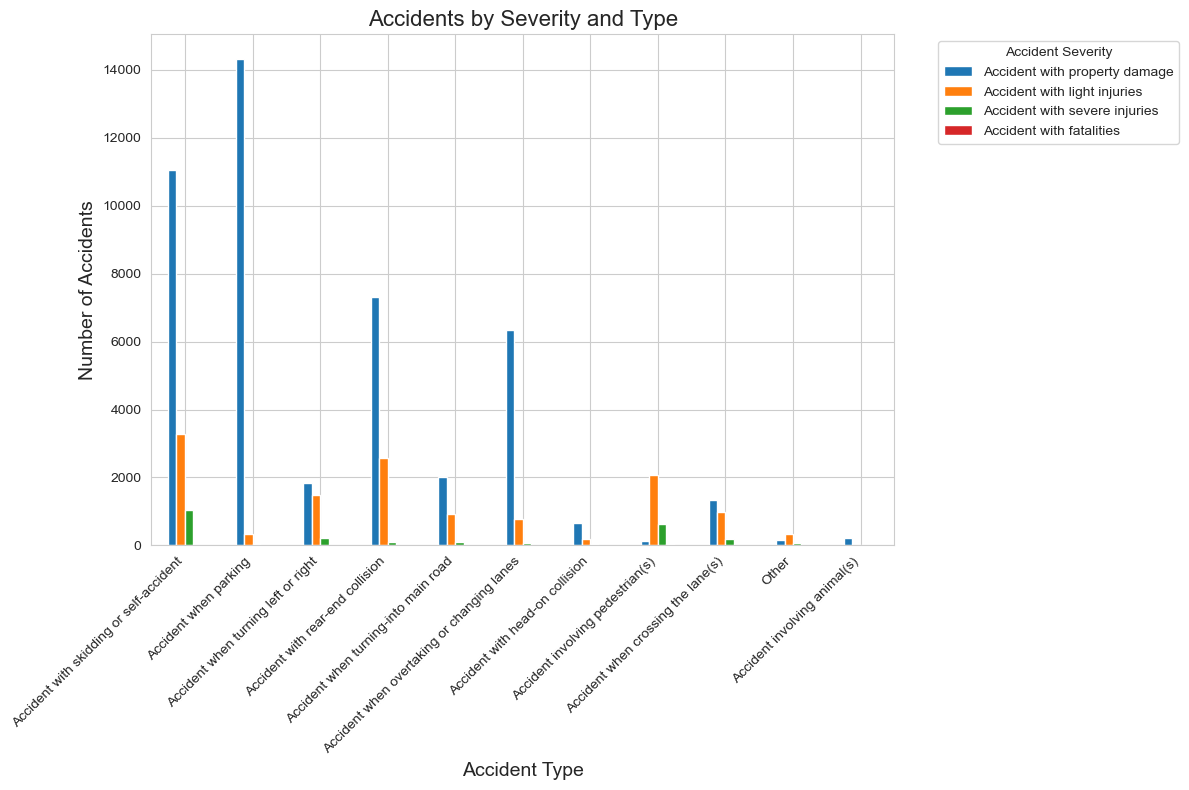

In [676]:
# numer of accidents by accident severity and day of the week
# extracting the data
accidents_per_type = {}
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for AccidentType in data['AccidentType_en'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['AccidentType_en'] == AccidentType)
        ].shape[0]
        counts.append(count)
    accidents_per_type[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order =  data['AccidentType_en'].unique()
columns =  data['AccidentType_en'].unique()
result_df = pd.DataFrame.from_dict(accidents_per_type, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='bar', figsize=(12, 8))

# Customize the plot
plt.title('Accidents by Severity and Type', fontsize=16)
plt.xlabel('Accident Type', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()
    

Accidents with property damage often happens because of skidding, parking or changing lanes/overtaking. 

Light injuries ocurr in rear-end collisions, accidents with pedestrians, skidding or self-accidents.

Severe injuries also happen because of skidding and in accidents with pedestrians.

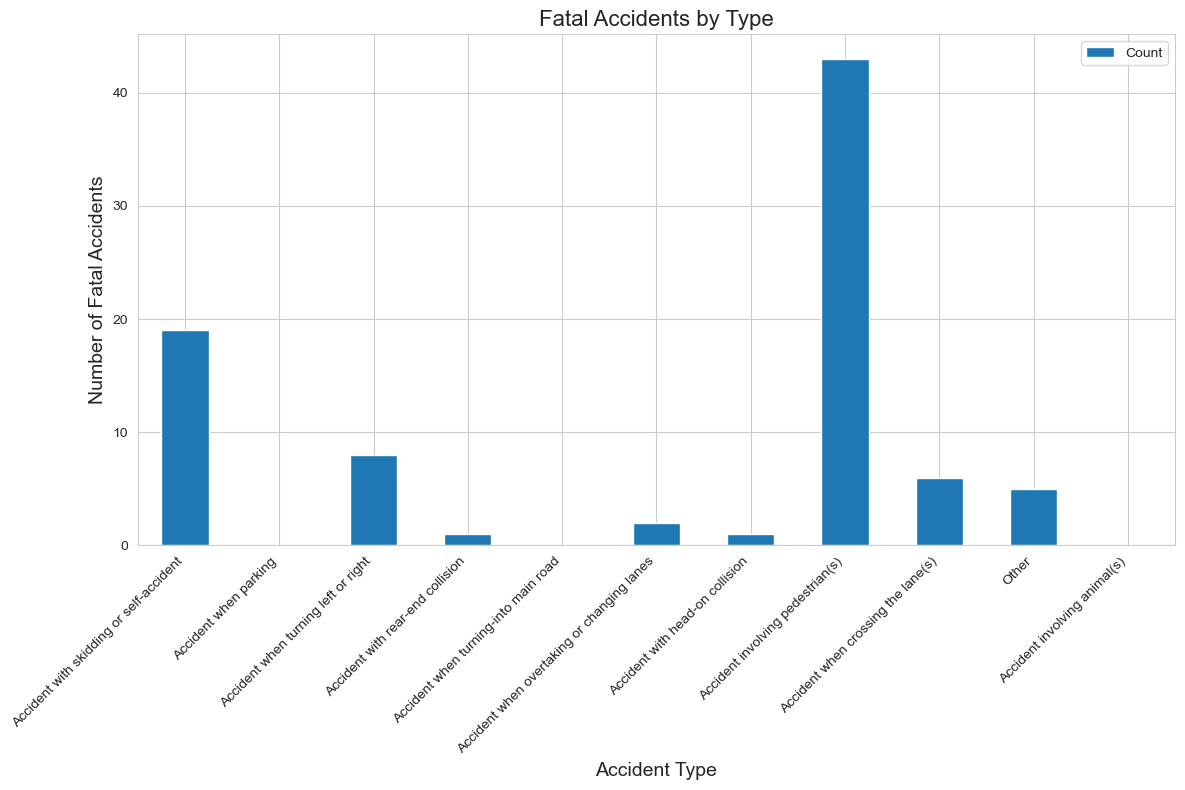

In [677]:
# Number of Accidents by Type and Fatalities
# Filter the data to include only accidents with fatalities
fatal_accidents = data[data['AccidentSeverityCategory_en'] == 'Accident with fatalities']

# Extracting the data
accidents_per_type = {}
for AccidentType in fatal_accidents['AccidentType_en'].unique():
    count = fatal_accidents[fatal_accidents['AccidentType_en'] == AccidentType].shape[0]
    accidents_per_type[AccidentType] = count

# Create a pandas DataFrame from the extracted data
result_df = pd.DataFrame(list(accidents_per_type.items()), columns=['AccidentType', 'Count'])

# Ensure the order is the same as in the other plot
desired_order = data['AccidentType_en'].unique()
result_df = result_df.set_index('AccidentType').reindex(desired_order).reset_index()

# Plot the data
result_df.set_index('AccidentType').plot(kind='bar', figsize=(12, 8))

# Customize the plot
plt.title('Fatal Accidents by Type', fontsize=16)
plt.xlabel('Accident Type', fontsize=14)
plt.ylabel('Number of Fatal Accidents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


The number of accidents with fatalities is quite low. Most of the accidents with fatalities happen in accidents involving pedestrians. 

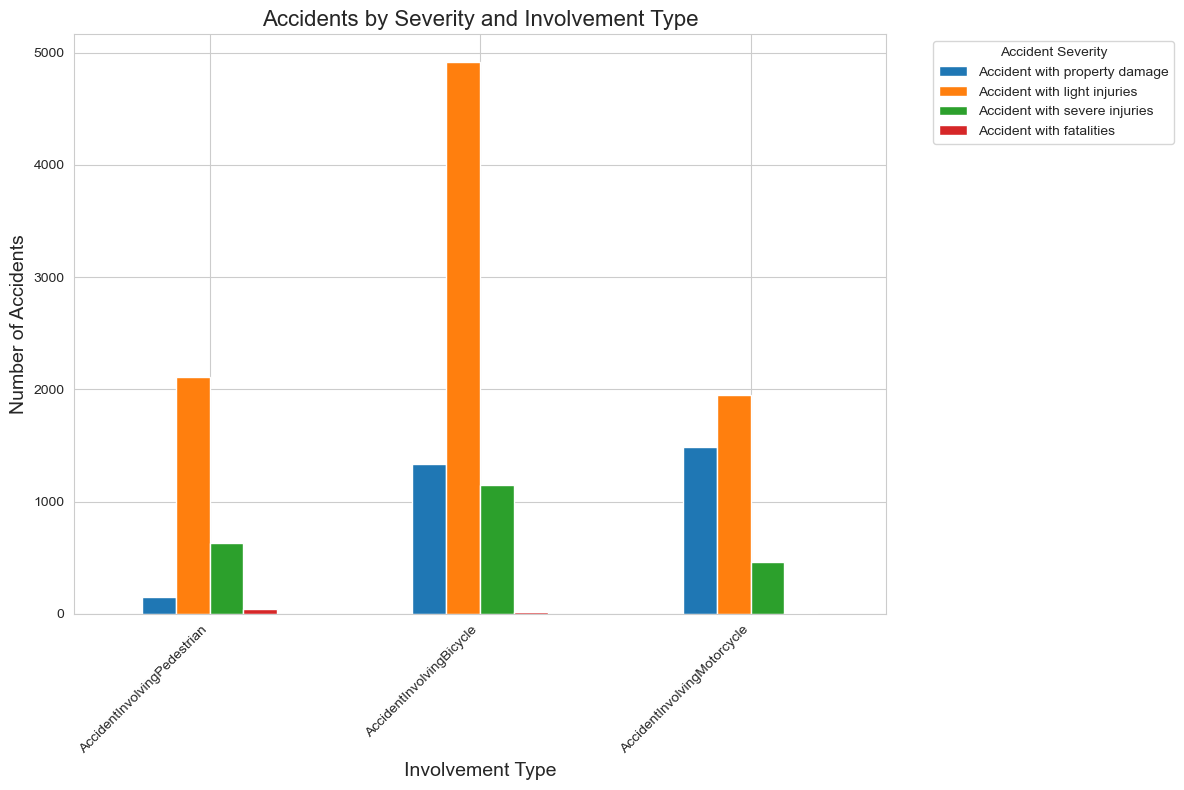

In [678]:
# numer of accidents by accident severity and Involvement of others
# extracting the data
accidents_per_involvement = {} 
involvement_columns = ['AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle'] 
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique(): 
    counts = [] 
    for Involvement in involvement_columns: 
        count = data.loc[ (data['AccidentSeverityCategory_en'] == AccidentSeverity) & (data[Involvement] == True) ].shape[0] 
        counts.append(count) 
        accidents_per_involvement[AccidentSeverity] = counts 
        
# Create a pandas DataFrame from the extracted data 
        
columns = involvement_columns 
result_df = pd.DataFrame.from_dict(accidents_per_involvement, orient='index', columns=columns) 

result_df.reset_index(inplace=True) 
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True) 

# Plot the data 
result_df.T.plot(kind='bar', figsize=(12, 8)) 

# Customize the plot 
plt.title('Accidents by Severity and Involvement Type', fontsize=16) 
plt.xlabel('Involvement Type', fontsize=14) 
plt.ylabel('Number of Accidents', fontsize=14) 
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.xticks(rotation=45, ha='right') 

plt.tight_layout() 
plt.show()

Accident involving pedestrians is doubled... 

## 2.6 Encoding
The data has to be transformed into numerical values.
Firstly the unique values of the columns are checked.


In [679]:
# Check the unique values of the columns
for col in data.columns:
    print(col, data[col].unique())

AccidentSeverityCategory_en ['Accident with property damage' 'Accident with light injuries'
 'Accident with severe injuries' 'Accident with fatalities']
AccidentType_en ['Accident with skidding or self-accident' 'Accident when parking'
 'Accident when turning left or right' 'Accident with rear-end collision'
 'Accident when turning-into main road'
 'Accident when overtaking or changing lanes'
 'Accident with head-on collision' 'Accident involving pedestrian(s)'
 'Accident when crossing the lane(s)' 'Other'
 'Accident involving animal(s)']
AccidentInvolvingPedestrian [False  True]
AccidentInvolvingBicycle [False  True]
AccidentInvolvingMotorcycle [False  True]
RoadType_en ['Minor road' 'Principal road' 'Other']
AccidentMonth [ 1  2  3  4  5  6  7  8  9 10 11 12]
AccidentWeekDay_en ['Friday' 'Saturday' 'Thursday' 'Wednesday' 'Monday' 'Tuesday' 'Sunday']
AccidentHour [ 8 17 10 13 14  7  9 12 19 23 16  4 11 18 15  1  2 20  0  6 21  5 22  3]


Now the data has to be transformed into numerical values. 
* AccidentSeverity_en --> OrdinalEncoding (has hierarchical order)
* AccidentType_en --> OneHotEncoding
* RoadType_en --> OneHotEncoding
* AccidentMonth --> TrigonometricEncoding (Cyclic pattern)
* AccidentWeekDay_en --> OrdinalEncoding then TrigonometricEncoding (Cyclic pattern)
* AccidentHour --> TrigonometricEncoding (Cycle pattern)
* AccidentInvolvingPedestrian --> Boolean
* AccidentInvolvingBicycle --> Boolean
* AccidentInvolvingMotorcycle --> Boolean

Encoding of RoadType_en will be done with OneHotEncoding, because we didn't want to introduce a ranking of the different road types. This procedures is suitable for the planed models kNN, RandomForest and SVM. Unfortunately this will increase the dimensionality of the data.
Alternatively we could use OrdinalEncoding  which would have been quite straight forward. This would incude a ranking of the different road types.

Encoding of AccidentWeekDay_en will be done with OrdinalEncoding. This is simple and efficient. A drawback is that a possible cyclic pattern will not be considered. 
To ensure that the cyclic pattern is considered, we could use a CyclicEncoding. This would be more complex and is not implemented here.
## 2.6.1 Encoding of AccidentSeverityCategory_en, OrdinalEncoding

In [680]:
# Transform the data
# to check the transformation a new empty dataframe is created, where the transformed data will be stored
data_transformed = pd.DataFrame()

# Order of categories for AccidentSeverityCategory_en
categories_order = [['Accident with property damage', 'Accident with light injuries', 'Accident with severe injuries', 'Accident with fatalities']]

# OrdinalEncoding for AccidentSeverityCategory_en
OrdEN_Label = preprocessing.OrdinalEncoder(categories=categories_order)
# define the index to introduce a hierarchical order

# fit and transform the data   
data_transformed['AccidentSeverityCategory_en'] = OrdEN_Label.fit_transform(data['AccidentSeverityCategory_en'].values.reshape(-1,1)).flatten()

# check the transformed column against the original column
data_transformed['AccidentSeverityCategory_en'].unique(), data['AccidentSeverityCategory_en'].unique()


(array([0., 1., 2., 3.]),
 array(['Accident with property damage', 'Accident with light injuries',
        'Accident with severe injuries', 'Accident with fatalities'],
       dtype=object))

## 2.6.2 Encoding of AccidentType_en, OneHotEncoding

In [681]:
# OneHotEncoding for AccidentType_en
OHE = preprocessing.OneHotEncoder()

OHE_AccidentType_en = data['AccidentType_en'].values.reshape(-1,1)
OHE_AccidentType_en = OHE.fit_transform(OHE_AccidentType_en).toarray()

# Delete AccidentType_en from pandas DataFrame and add the new columns from the OneHotEncoding
data_transformed = pd.concat([data_transformed, pd.DataFrame(OHE_AccidentType_en, columns=['Accident involving animal(s)', 
                                                                                           'Accident involving pedestrian(s)',
                                                                                           'Accident when crossing the lane(s)',
                                                                                           'Accident when overtaking or changing lanes', 
                                                                                           'Accident when parking', 
                                                                                           'Accident when turning left or right', 
                                                                                           'Accident when turning-into main road',
                                                                                           'Accident with head-on collision',
                                                                                           'Accident with rear-end collision',
                                                                                           'Accident with skidding or self-accident',
                                                                                           'Other'])], axis=1)

# check the transformed column against the original column
(data_transformed[[                                                                        'Accident with skidding or self-accident', 
                                                                                           'Accident when parking',
                                                                                           'Accident when turning left or right',
                                                                                           'Accident with rear-end collision', 
                                                                                           'Accident when turning-into main road', 
                                                                                           'Accident when overtaking or changing lanes', 
                                                                                           'Accident with head-on collision',
                                                                                           'Accident involving pedestrian(s)',
                                                                                           'Accident when crossing the lane(s)',
                                                                                           'Other',
                                                                                           'Accident involving animal(s)']].head(10)), data['AccidentType_en'].head(10)

(   Accident with skidding or self-accident  Accident when parking  \
 0                                      1.0                    0.0   
 1                                      0.0                    1.0   
 2                                      0.0                    0.0   
 3                                      0.0                    0.0   
 4                                      0.0                    1.0   
 5                                      0.0                    0.0   
 6                                      0.0                    0.0   
 7                                      0.0                    0.0   
 8                                      0.0                    0.0   
 9                                      0.0                    1.0   
 
    Accident when turning left or right  Accident with rear-end collision  \
 0                                  0.0                               0.0   
 1                                  0.0                               0.0 

## 2.6.3 Encoding of RoadType_en, OneHotEncoding

In [682]:


# OneHotEncoding for RoadType_en
OHE = preprocessing.OneHotEncoder()
OHE_RoadType_en = data['RoadType_en'].values.reshape(-1,1)
OHE_RoadType_en = OHE.fit_transform(OHE_RoadType_en).toarray()

# Add the new columns from the OneHotEncoding
data_transformed = pd.concat([data_transformed, pd.DataFrame(OHE_RoadType_en, columns=['Minor road', 'Other road type', 'Principal road'])], axis=1)

# show the three columns of the transformed data
data_transformed[['Minor road', 'Principal road', 'Other road type']].head(10), data['RoadType_en'].head(10)


(   Minor road  Principal road  Other road type
 0         1.0             0.0              0.0
 1         1.0             0.0              0.0
 2         1.0             0.0              0.0
 3         0.0             1.0              0.0
 4         0.0             0.0              1.0
 5         1.0             0.0              0.0
 6         1.0             0.0              0.0
 7         0.0             1.0              0.0
 8         1.0             0.0              0.0
 9         1.0             0.0              0.0,
 0        Minor road
 1        Minor road
 2        Minor road
 3    Principal road
 4             Other
 5        Minor road
 6        Minor road
 7    Principal road
 8        Minor road
 9        Minor road
 Name: RoadType_en, dtype: object)

## 2.6.4 Encoding of AccidentMonth, TrigonometricEncoding

In [683]:
# Trigonometric encoding
data_transformed['AccidentMonth_sin'] = np.sin(2 * np.pi * data['AccidentMonth'] / 12)
data_transformed['AccidentMonth_cos'] = np.cos(2 * np.pi * data['AccidentMonth'] / 12)

# check the transformed column against the original column
data_transformed[['AccidentMonth_sin', 'AccidentMonth_cos']][:10], data['AccidentMonth'][:10]

(   AccidentMonth_sin  AccidentMonth_cos
 0                0.5           0.866025
 1                0.5           0.866025
 2                0.5           0.866025
 3                0.5           0.866025
 4                0.5           0.866025
 5                0.5           0.866025
 6                0.5           0.866025
 7                0.5           0.866025
 8                0.5           0.866025
 9                0.5           0.866025,
 0    1
 1    1
 2    1
 3    1
 4    1
 5    1
 6    1
 7    1
 8    1
 9    1
 Name: AccidentMonth, dtype: int64)

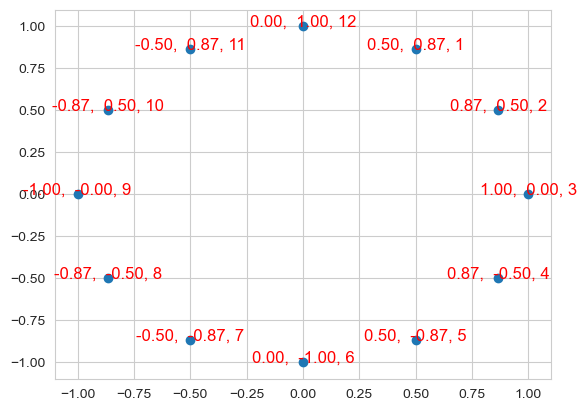

In [684]:
# Visualisation of the Trigonometric Encoding to map the months to the points in the circle
def calc_sin_cos(point, max_points):
    sin = np.sin(2 * np.pi * point / max_points)
    cos = np.cos(2 * np.pi * point / max_points)
    return sin, cos

sinus = []
cosinus = []

for i in range(12):
    sin, cos = calc_sin_cos(i, 12)
    sinus.append(sin)
    cosinus.append(cos)
    
fig, ax = plt.subplots()
ax.scatter(sinus, cosinus)

month = 12
for sin, cos in zip(sinus, cosinus):
    text = f"{sin:.2f},  {cos:.2f}, {month}"
    ax.text(sin, cos, text, fontsize=12, ha='center', color = 'red')
    month +=1
    if month > 12:
        month = 1
    
plt.show()

# 1 = January, 2 = February, 3 = March, 4 = April, 5 = May, 6 = June, 7 = July, 8 = August, 9 = September, 10 = October, 11 = November, 12 = December


## 2.6.5 Encoding of AccidentWeekDay_en, OrdinalEncoding and TrigonometricEncoding

In [685]:
# Trigonometric Encoding for AccidentWeekDay_en
# Firstly Ordinal Encoding the days of the week
# Order of categories for AccidentWeekDay_en
categories_order = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# OrdinalEncoding for AccidentWeekDay_en
OrdEN_Weekdays = preprocessing.OrdinalEncoder(categories=categories_order)

# fit and transform the data
data_transformed['AccidentWeekDay_en'] = OrdEN_Weekdays.fit_transform(data['AccidentWeekDay_en'].values.reshape(-1,1)).flatten()

# check the transformed column against the original column
data_transformed['AccidentWeekDay_en'].unique(), data['AccidentWeekDay_en'].unique()


(array([4., 5., 3., 2., 0., 1., 6.]),
 array(['Friday', 'Saturday', 'Thursday', 'Wednesday', 'Monday', 'Tuesday',
        'Sunday'], dtype=object))

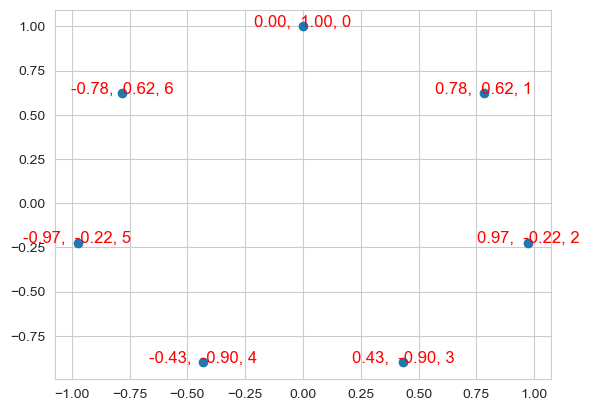

In [686]:
sinus = []
cosinus = []

for i in range(7):
    sin, cos = calc_sin_cos(i, 7)
    sinus.append(sin)
    cosinus.append(cos)
    
fig, ax = plt.subplots()
ax.scatter(sinus, cosinus)

weekday = 0
for sin, cos in zip(sinus, cosinus):
    text = f"{sin:.2f},  {cos:.2f}, {weekday}"
    ax.text(sin, cos, text, fontsize=12, ha='center', color = 'red')
    weekday +=1
    
plt.show()

# 0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday

In [687]:
data_transformed['AccidentWeekDay_sin'] = np.sin(2 * np.pi * data_transformed['AccidentWeekDay_en'] / 7)
data_transformed['AccidentWeekDay_cos'] = np.cos(2 * np.pi * data_transformed['AccidentWeekDay_en'] / 7)

# Drop the ordinal encoded column
data_transformed.drop('AccidentWeekDay_en', axis=1, inplace=True)

# check the transformed column against the original column
data_transformed[['AccidentWeekDay_sin', 'AccidentWeekDay_cos']][:10], data['AccidentWeekDay_en'][:10]

(   AccidentWeekDay_sin  AccidentWeekDay_cos
 0            -0.433884            -0.900969
 1            -0.974928            -0.222521
 2             0.433884            -0.900969
 3             0.433884            -0.900969
 4             0.974928            -0.222521
 5            -0.433884            -0.900969
 6             0.000000             1.000000
 7             0.433884            -0.900969
 8            -0.974928            -0.222521
 9             0.000000             1.000000,
 0       Friday
 1     Saturday
 2     Thursday
 3     Thursday
 4    Wednesday
 5       Friday
 6       Monday
 7     Thursday
 8     Saturday
 9       Monday
 Name: AccidentWeekDay_en, dtype: object)

## 2.6.6 Encoding of AccidentHour, TrigonometricEncoding

In [688]:
# Encoding AccidentHour, TrigonometricEncoding
data_transformed['AccidentHour_sin'] = np.sin(2 * np.pi * data['AccidentHour'] / 24)
data_transformed['AccidentHour_cos'] = np.cos(2 * np.pi * data['AccidentHour'] / 24)

# check the transformed column against the original column
data_transformed[['AccidentHour_sin', 'AccidentHour_cos']][:10], data['AccidentHour'][:10]


(   AccidentHour_sin  AccidentHour_cos
 0          0.866025         -0.500000
 1         -0.965926         -0.258819
 2          0.500000         -0.866025
 3         -0.258819         -0.965926
 4          0.500000         -0.866025
 5         -0.500000         -0.866025
 6          0.866025         -0.500000
 7          0.965926         -0.258819
 8          0.707107         -0.707107
 9         -0.258819         -0.965926,
 0     8
 1    17
 2    10
 3    13
 4    10
 5    14
 6     8
 7     7
 8     9
 9    13
 Name: AccidentHour, dtype: int64)

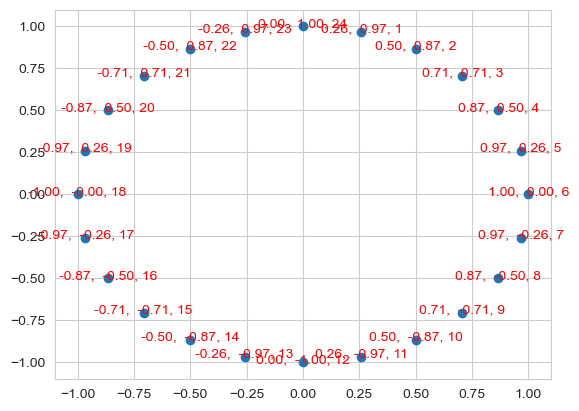

In [689]:
# Plot the Trigonometric Encoding to map the hours to the points
sinus = []
cosinus = []

for i in range(24):
    sin, cos = calc_sin_cos(i, 24)
    sinus.append(sin)
    cosinus.append(cos)
    
fig, ax = plt.subplots()
ax.scatter(sinus, cosinus)

hour = 24
for sin, cos in zip(sinus, cosinus):
    text = f"{sin:.2f},  {cos:.2f}, {hour}"
    ax.text(sin, cos, text, fontsize=10, ha='center', color = 'red')
    hour +=1
    if hour > 24:
        hour = 1
    
plt.show()


## 2.6.7 Encode AccidentInvolving(Pedestrians, Bicycle, Motorcycle), BooleanEncoding


In [695]:
# Adding the columns with the boolean values
data_transformed['AccidentInvolvingPedestrian'] = data['AccidentInvolvingPedestrian']
data_transformed['AccidentInvolvingBicycle'] = data['AccidentInvolvingBicycle']
data_transformed['AccidentInvolvingMotorcycle'] = data['AccidentInvolvingMotorcycle']

# change the entries to 0 and 1
data_transformed['AccidentInvolvingPedestrian'] = data_transformed['AccidentInvolvingPedestrian'].astype(int)
data_transformed['AccidentInvolvingBicycle'] = data_transformed['AccidentInvolvingBicycle'].astype(int)
data_transformed['AccidentInvolvingMotorcycle'] = data_transformed['AccidentInvolvingMotorcycle'].astype(int)

# Check the transformed data
data_transformed.head(20)

,AccidentSeverityCategory_en,Accident involving animal(s),Accident involving pedestrian(s),Accident when crossing the lane(s),Accident when overtaking or changing lanes,Accident when parking,Accident when turning left or right,Accident when turning-into main road,Accident with head-on collision,Accident with rear-end collision,...,Principal road,AccidentMonth_sin,AccidentMonth_cos,AccidentWeekDay_sin,AccidentWeekDay_cos,AccidentHour_sin,AccidentHour_cos,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,-0.433884,-0.900969,8.660254e-01,-0.500000,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,-0.974928,-0.222521,-9.659258e-01,-0.258819,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,0.433884,-0.900969,5.000000e-01,-0.866025,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.5,0.866025,0.433884,-0.900969,-2.588190e-01,-0.965926,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,0.974928,-0.222521,5.000000e-01,-0.866025,0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.5,0.866025,-0.433884,-0.900969,-5.000000e-01,-0.866025,0,0,0
6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,0.000000,1.000000,8.660254e-01,-0.500000,0,1,0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.5,0.866025,0.433884,-0.900969,9.659258e-01,-0.258819,0,0,0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.5,0.866025,-0.974928,-0.222521,7.071068e-01,-0.707107,0,0,0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.866025,0.000000,1.000000,-2.588190e-01,-0.965926,0,0,0


# 2.7 Correlation Plot

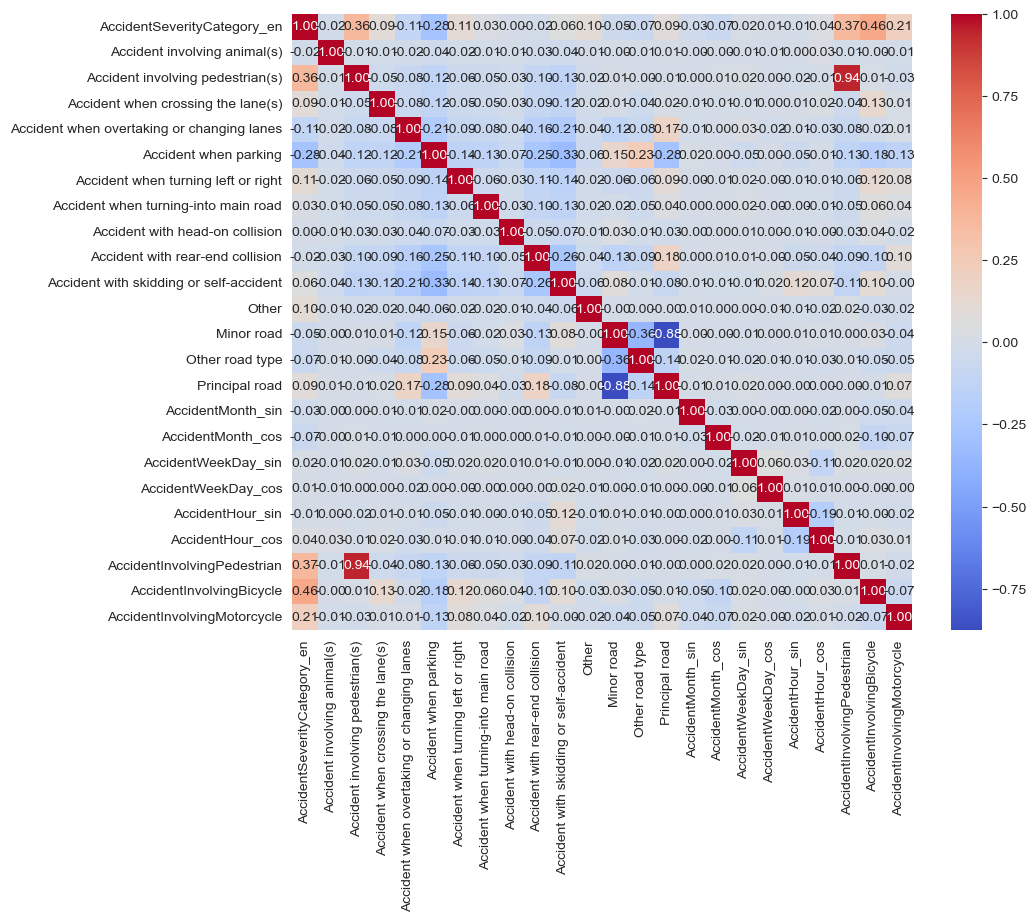

In [702]:
correlation_matrix = data_transformed.corr()
# print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Interpretation of the correlation matrix:...
Reduce the dimensionality of the data by removing the columns that are not highly correlated with the target variable

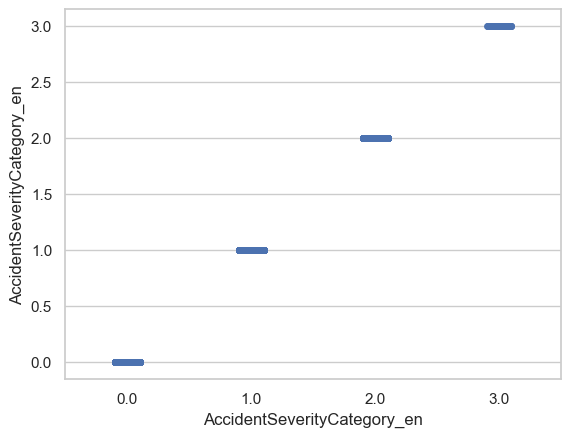

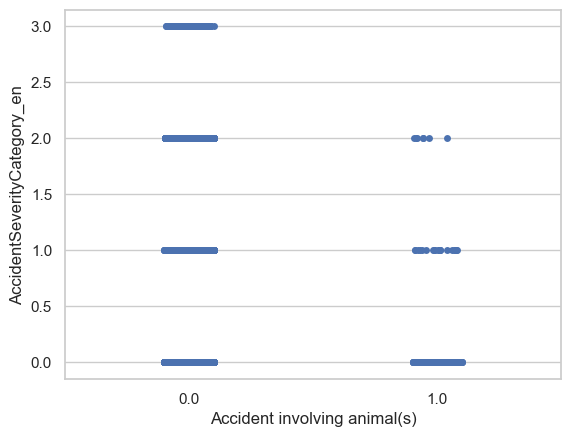

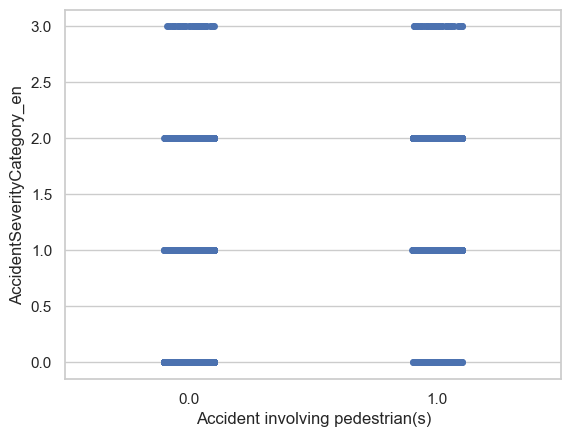

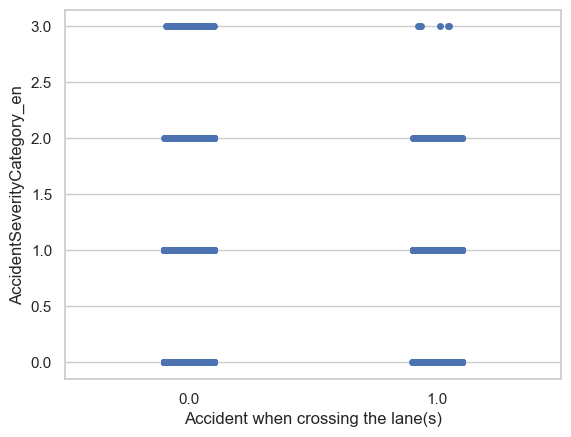

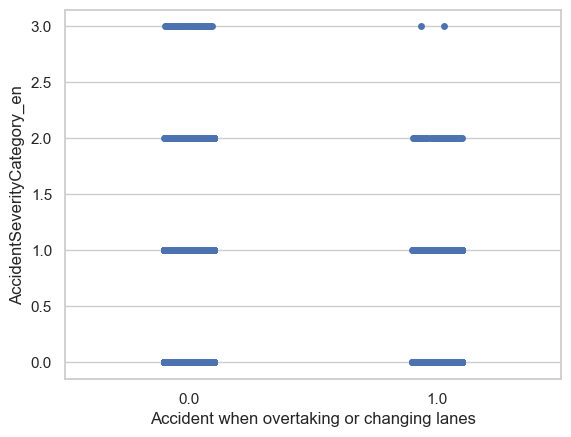

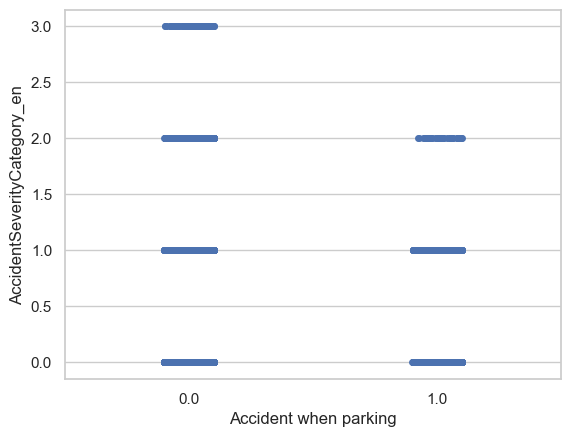

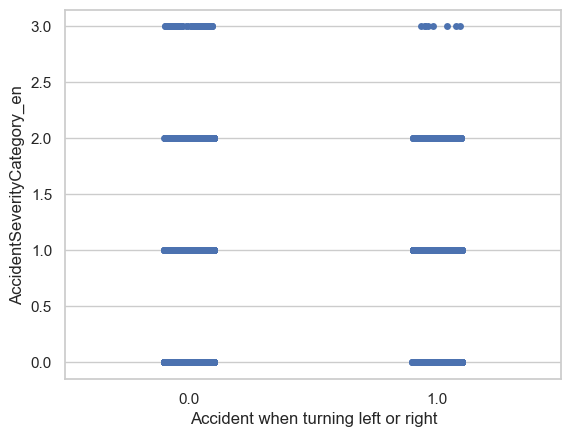

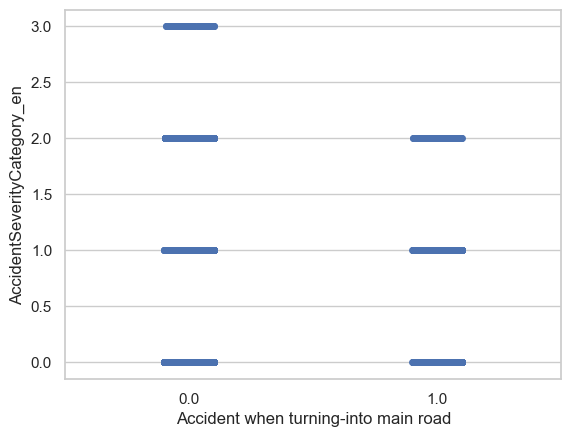

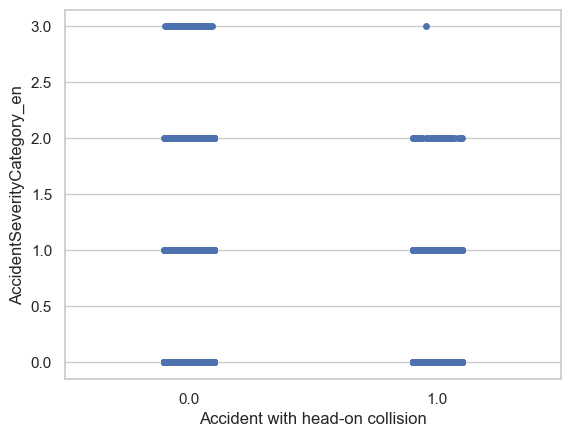

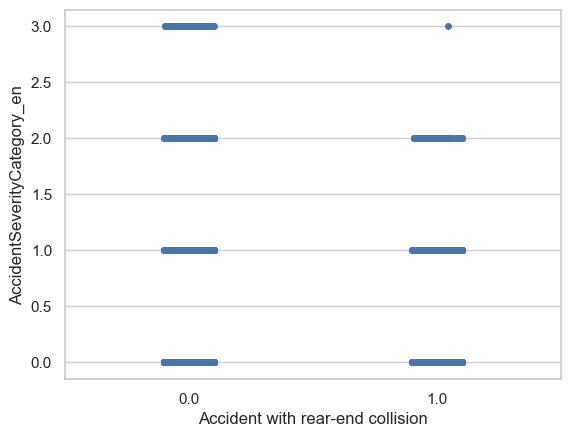

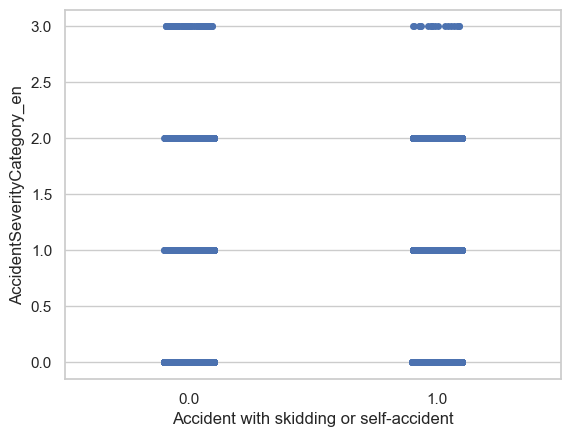

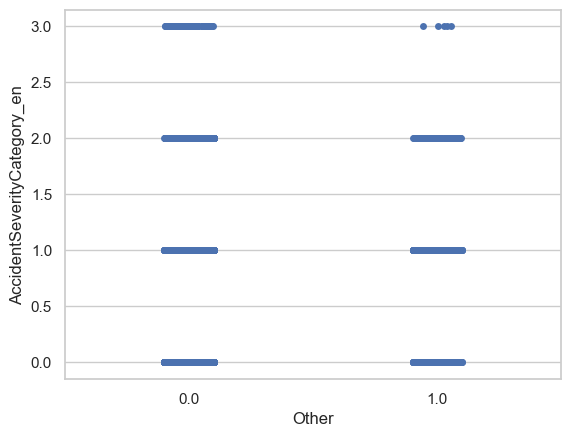

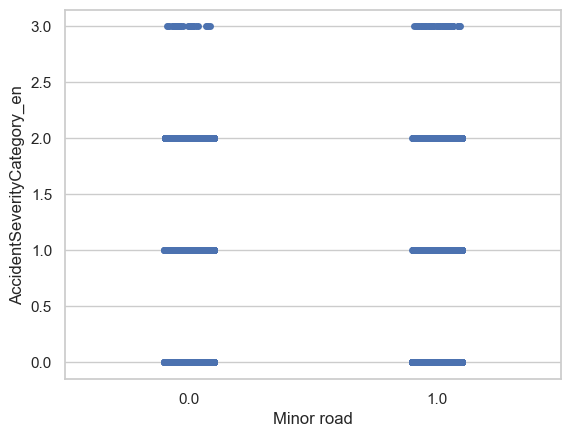

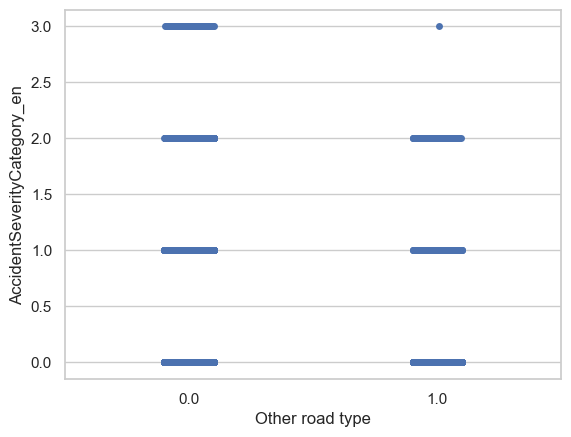

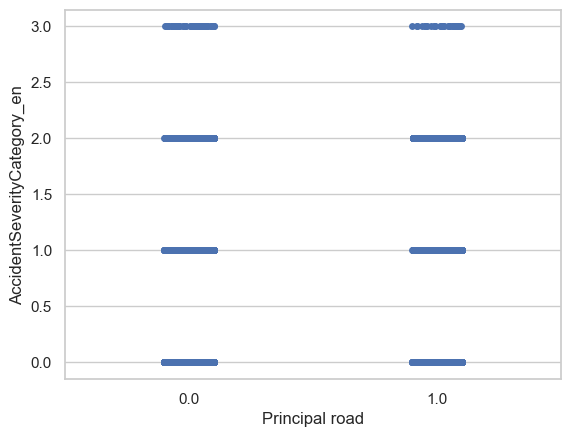

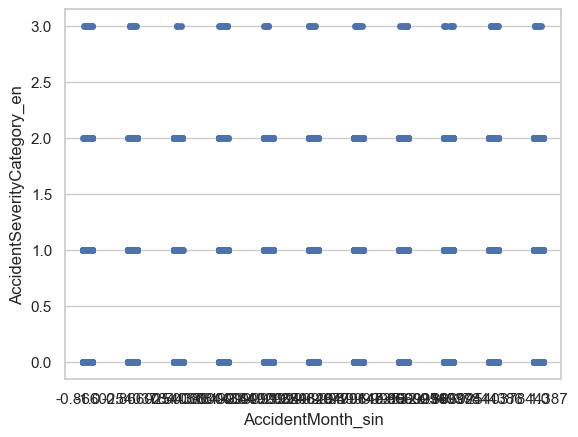

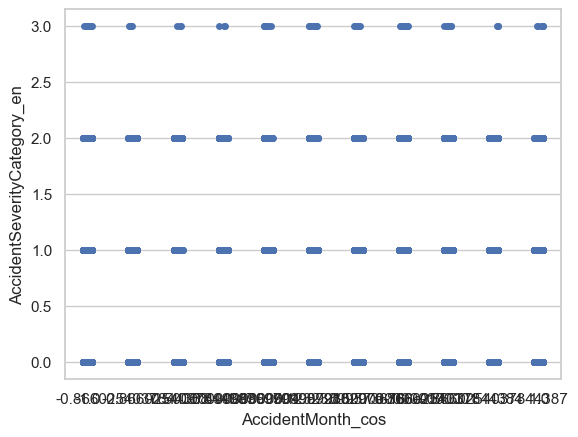

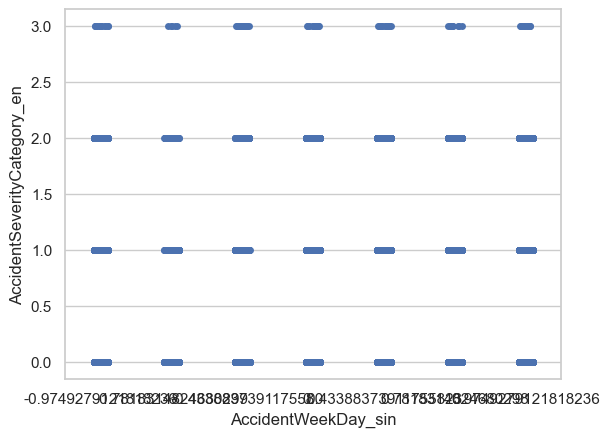

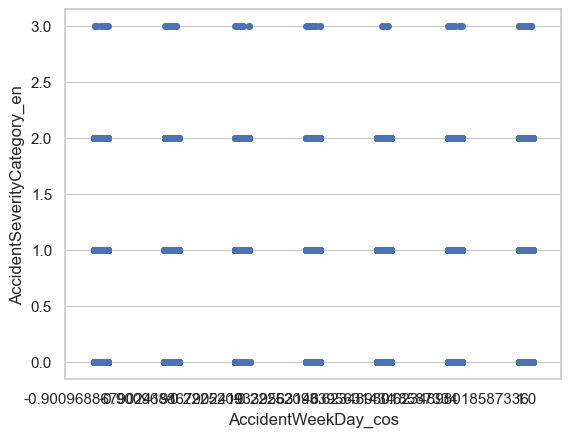

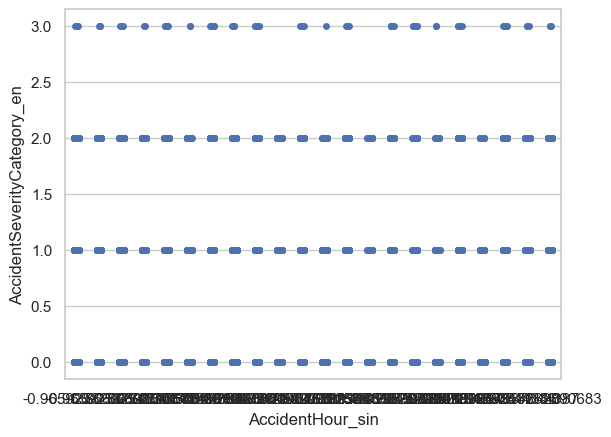

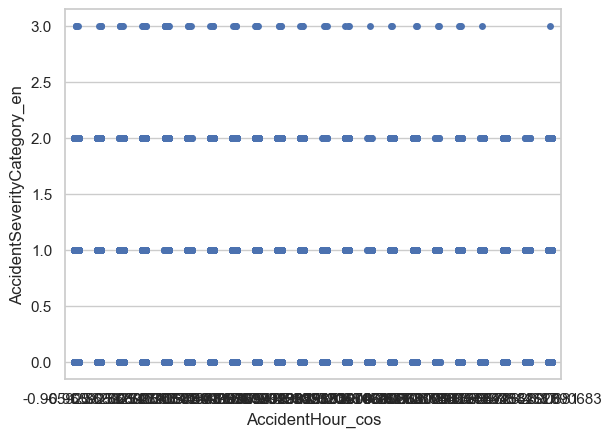

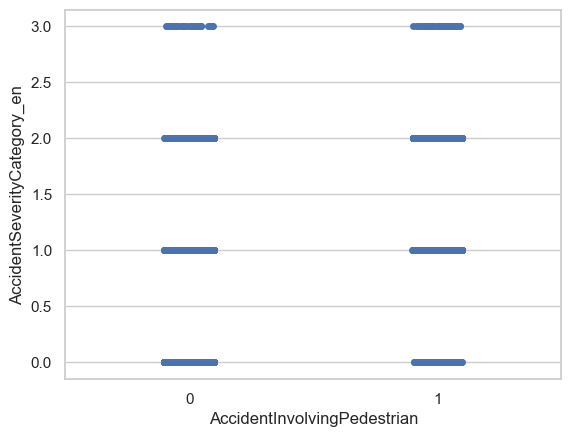

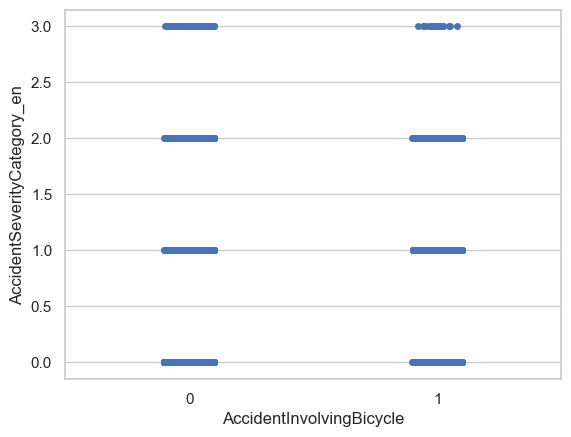

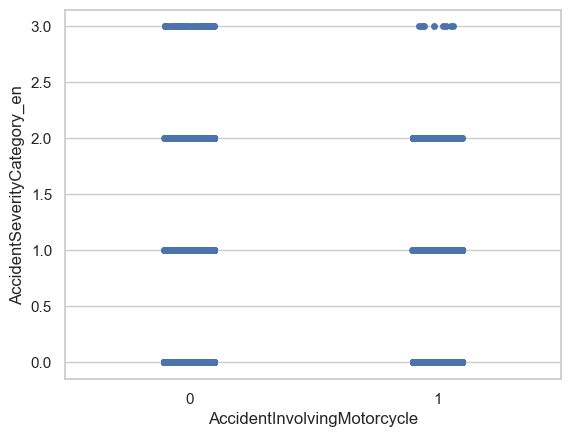

In [738]:
# # create a list of all column names
# column_names = data_transformed.columns
# 
# # plot the data
# for col_name in column_names:
#     fig, ax = plt.subplots()
#     sns.stripplot(y = data_transformed['AccidentSeverityCategory_en'], x = data_transformed[col_name], jitter=0.1)
#     ax.set_ylabel('AccidentSeverityCategory_en')
#     ax.set_xlabel(col_name)
#     plt.show()
# 
